In [1]:
#-------------------------------------------------------
# Importar paquetes a utilizar
#-------------------------------------------------------
import pandas as pd
import numpy as np 
import networkx as nx
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()



#-------------------------------------------------------
# Archivo CSV describiendo los nodos de cada red
#-------------------------------------------------------
ags_nd=pd.read_csv('Gephi_stats/Gephi AGS Stats.csv')             
caba_nd=pd.read_csv('Gephi_stats/Gephi CABA Stats.csv')           #capital
cdmx_nd=pd.read_csv('Gephi_stats/Gephi CDMX Stats.csv')           #capital
gdl_nd=pd.read_csv('Gephi_stats/Gephi GDL Stats.csv') 
hgo_nd=pd.read_csv('Gephi_stats/Gephi Hidalgo Stats.csv')
mad_nd=pd.read_csv('Gephi_stats/Gephi Madrid Stats.csv')          #capital
mtv_nd=pd.read_csv('Gephi_stats/Gephi Montevideo Stats.csv')      #capital
oax_nd=pd.read_csv('Gephi_stats/Gephi Oaxaca Stats.csv')
sao_nd=pd.read_csv('Gephi_stats/Gephi Sao Paulo Stats.csv')       #capital
scl_nd=pd.read_csv('Gephi_stats/Gephi SCL Stats.csv')             #capital


#-------------------------------------------------------
# Archivo CSV describiendo las aristas de cada red
#-------------------------------------------------------
ags_ed=pd.read_csv('Gephi_edges/Gephi AGS Edges.csv')
caba_ed=pd.read_csv('Gephi_edges/Gephi CABA Edges.csv')           #capital
cdmx_ed=pd.read_csv('Gephi_edges/Gephi CDMX Edges.csv')           #capital
gdl_ed=pd.read_csv('Gephi_edges/Gephi GDL Edges.csv')
hgo_ed=pd.read_csv('Gephi_edges/Gephi Hidalgo Edges.csv')
mad_ed=pd.read_csv('Gephi_edges/Gephi Madrid Edges.csv')          #capital
mtv_ed=pd.read_csv('Gephi_edges/Gephi Montevideo Edges.csv')      #capital
oax_ed=pd.read_csv('Gephi_edges/Gephi Oaxaca Edges.csv')
sao_ed=pd.read_csv('Gephi_edges/Gephi Sao Paulo Edges.csv')       #capital
scl_ed=pd.read_csv('Gephi_edges/Gephi SCL Edges.csv')             #capital

In [2]:
def armar_grafo(nodes,edges,rol_str,weight_str):
    '''
    Función con la cual, a partir de una lista de nodos y conexiones, forma un grafo con NetworkX
    
    In:
    - nodes       lista de nodos
    - edges       lista de aristas
    - rol_str     un nombre para el parámetro que describe el rol de un actor
    - weight_str  un nombre para el parámetro que describe el peso de las aristas
    
    Out
    Un objeto NetworkX llamado G.
    '''
    
    #crea un grafo dirigido a partirde la lista edges
    G=nx.from_pandas_edgelist(edges,'Source','Target',edge_attr=["Weight"],create_using=nx.DiGraph())
    
    #rol es un diccionario que manda cada id de un nodo a el atributo correspondiente a rol
    rol = {nid: nodes[nodes['Id']==nid][rol_str].values[0] for nid in nodes['Id']}
    nx.set_node_attributes(G,rol,'rol')
    
    #weight es un diccionario que manda cada id de un nodo a el atributo correspondiente al peso de nodo
    weight = {nid: nodes[nodes['Id']==nid][weight_str].values[0] for nid in nodes['Id']}
    nx.set_node_attributes(G,weight,'weight')
    
    return G

In [3]:
#--------------------------------------------------------------
#Armar grafos a partir de cada uno de los CSV que descargamos
#--------------------------------------------------------------

ags_G=armar_grafo(ags_nd,ags_ed,'role','weight')
caba_G=armar_grafo(caba_nd,caba_ed,'type','weight')
cdmx_G=armar_grafo(cdmx_nd,cdmx_ed,'rol estimado','weight')
gdl_G=armar_grafo(gdl_nd,gdl_ed,'type','weight')
hgo_G=armar_grafo(hgo_nd,hgo_ed,'type','weight')
mad_G=armar_grafo(mad_nd,mad_ed,'rol estimado','weight')
mtv_G=armar_grafo(mtv_nd,mtv_ed,'rol estimado','node size')
oax_G=armar_grafo(oax_nd,oax_ed,'rol','weight')
sao_G=armar_grafo(sao_nd,sao_ed,'rol estimado','weight')
scl_G=armar_grafo(scl_nd,scl_ed,'type','weight')


Matriz de artibuto Rol para la ciudad de CABA

[[0.01508621 0.0387931  0.00862069 0.01724138 0.04741379 0.        ]
 [0.05603448 0.31896552 0.01077586 0.06896552 0.12715517 0.01939655]
 [0.         0.         0.         0.         0.         0.        ]
 [0.00431034 0.05603448 0.00431034 0.03017241 0.0237069  0.01077586]
 [0.01724138 0.05603448 0.         0.01508621 0.03232759 0.        ]
 [0.00215517 0.01508621 0.         0.         0.00431034 0.        ]]


Matriz de artibuto Rol para la ciudad de CDMX

[[0.00398406 0.02390438 0.00199203 0.00199203 0.01195219 0.        ]
 [0.03784861 0.51394422 0.02390438 0.06772908 0.10956175 0.02788845]
 [0.00199203 0.02191235 0.00398406 0.         0.         0.        ]
 [0.00199203 0.02988048 0.         0.00199203 0.00398406 0.00199203]
 [0.00199203 0.01992032 0.         0.00199203 0.00796813 0.00398406]
 [0.         0.05179283 0.0059761  0.0059761  0.00398406 0.00398406]]


Matriz de artibuto Rol para la ciudad de Santiago de Chile

[[0.        

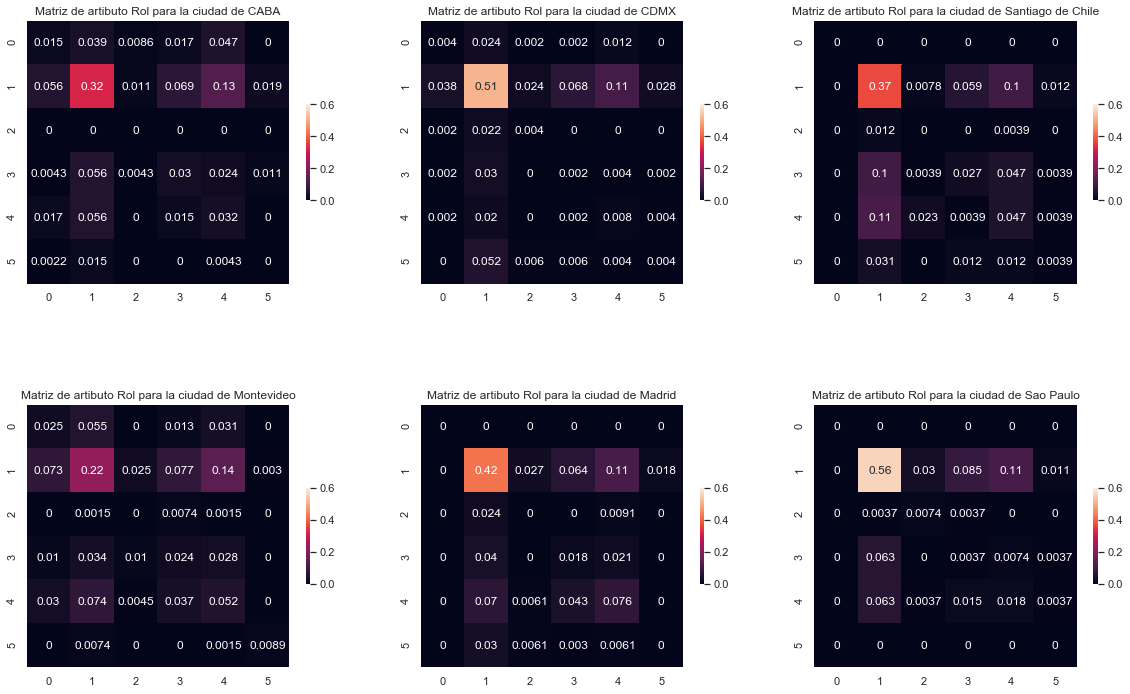

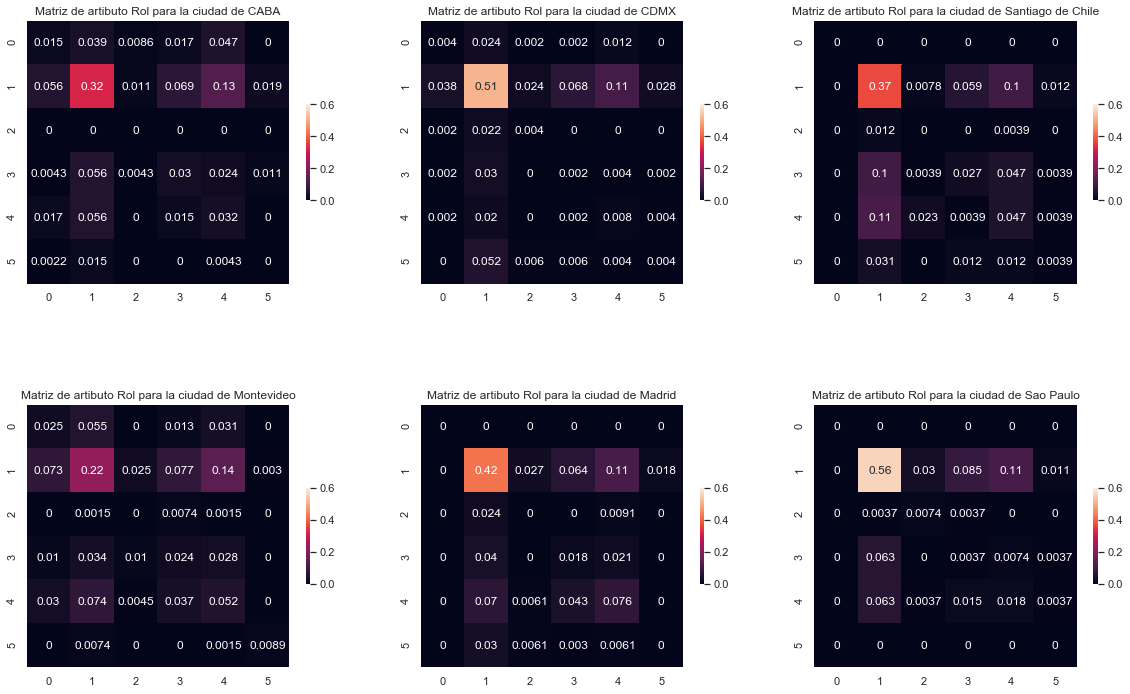

In [4]:
#-------------------------------------------------
# Attribute Mixing Matrices - Original graphs
#-------------------------------------------------
#       Obtenemos una matriz cuya entrada (i,j) es la fracción de aristas 
#       que van de un eje con rol i a un eje con rol j, en la red original


#cada rol lo asignamos a un índice del 1 al 5
rol_map_esp={'Generador de conocimiento':0,'Habilitador':1,'Promotor':2,
             'Vinculador':3,'Articulador':4,'Comunidad':5}

rol_map_ing={'Knowledge Generator':0,'Enabler':1,
             'Promoter':2,'Linker':3,'Articulator':4,'Community':5}

capitals = {'CABA': caba_G, 'CDMX':cdmx_G, 'Santiago de Chile': scl_G, 
            'Montevideo': mtv_G, 'Madrid': mad_G, 'Sao Paulo': sao_G}

#aquí vamos a almacenar las matrices
attr_mix_matrices = capitals 

#conseguimos cada una de las attribute mixing matrices
for capital_str in capitals.keys():
    if capital_str=='Montevideo':
        print('Matriz de artibuto Rol para la ciudad de '+capital_str)
        print('')
        M=nx.attribute_mixing_matrix(capitals[capital_str],'rol',mapping=rol_map_ing)
        print(M)
        print('')
        print('')
    else:
        print('Matriz de artibuto Rol para la ciudad de '+capital_str)
        print('')
        M=nx.attribute_mixing_matrix(capitals[capital_str],'rol',mapping=rol_map_esp)
        print(M)
        print('')
        print('')
    attr_mix_matrices[capital_str] = M

            
# Creamos la instancia de una figura, con subplots
fig = plt.figure(figsize = (20,20)) # ancho x alto
ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax1.set_title('Matriz de artibuto Rol para la ciudad de CABA')

ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('Matriz de artibuto Rol para la ciudad de CDMX')

ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Matriz de artibuto Rol para la ciudad de Santiago de Chile')

ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Matriz de artibuto Rol para la ciudad de Montevideo')

ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Matriz de artibuto Rol para la ciudad de Madrid')

ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('Matriz de artibuto Rol para la ciudad de Sao Paulo')


# We use ax parameter to tell seaborn which subplot to use for this plot
sns.heatmap(data=attr_mix_matrices['CABA'], ax=ax1, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)
sns.heatmap(data=attr_mix_matrices['CDMX'], ax=ax2, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)
sns.heatmap(data=attr_mix_matrices['Santiago de Chile'], ax=ax3, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)
sns.heatmap(data=attr_mix_matrices['Montevideo'], ax=ax4, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)
sns.heatmap(data=attr_mix_matrices['Madrid'], ax=ax5, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)      
sns.heatmap(data=attr_mix_matrices['Sao Paulo'], ax=ax6, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)      


fig

In [5]:
#----------------------
# Subgrafos Nucleares 
#----------------------
#    Obtenemos los -core- nodes (nodos núcleo) de cada una de las redes capitales, 
#    donde el grado total de un nodo núcleo es al menos 3

caba_sin_islas=nx.k_core(caba_G,k=2)
cdmx_sin_islas=nx.k_core(cdmx_G,k=2)
scl_sin_islas=nx.k_core(scl_G,k=2)
mad_sin_islas=nx.k_core(mad_G,k=2)
mtv_sin_islas=nx.k_core(mtv_G,k=2)
sao_sin_islas=nx.k_core(sao_G,k=2)

#----------------------
# GraphMLs Nucleares
#----------------------
#    Ahora, convertimos cada uno de los subgrafos nucleares que obtuvimos
#    en un archivo .graphml

nx.write_graphml(caba_sin_islas,'Gephi_sin_islas/CABA sin islas graph.graphml')
nx.write_graphml(cdmx_sin_islas,'Gephi_sin_islas/CDMX sin islas graph.graphml')
nx.write_graphml(scl_sin_islas,'Gephi_sin_islas/Scl sin islas graph.graphml')
nx.write_graphml(mad_sin_islas,'Gephi_sin_islas/Mad sin islas graph.graphml')
nx.write_graphml(mtv_sin_islas,'Gephi_sin_islas/Mtv sin islas graph.graphml')
nx.write_graphml(sao_sin_islas,'Gephi_sin_islas/Sao sin islas graph.graphml')

Matriz de artibuto Rol para el core de CABA

[[0.01146132 0.03724928 0.00573066 0.01432665 0.05444126 0.        ]
 [0.04297994 0.28366762 0.00859599 0.0773639  0.14613181 0.01432665]
 [0.         0.         0.         0.         0.         0.        ]
 [0.00573066 0.06876791 0.00573066 0.02292264 0.0286533  0.01432665]
 [0.01432665 0.07163324 0.         0.01719198 0.04011461 0.        ]
 [0.00286533 0.00859599 0.         0.         0.00286533 0.        ]]


Matriz de artibuto Rol para el core de CDMX

[[0.         0.03343465 0.         0.         0.01823708 0.        ]
 [0.03039514 0.48328267 0.01823708 0.0668693  0.12158055 0.02735562]
 [0.         0.01823708 0.00303951 0.         0.         0.        ]
 [0.         0.03951368 0.         0.00303951 0.00607903 0.00303951]
 [0.00303951 0.02431611 0.         0.00303951 0.01215805 0.00303951]
 [0.         0.06382979 0.00303951 0.00607903 0.00607903 0.00303951]]


Matriz de artibuto Rol para el core de Santiago de Chile

[[0.         0.   

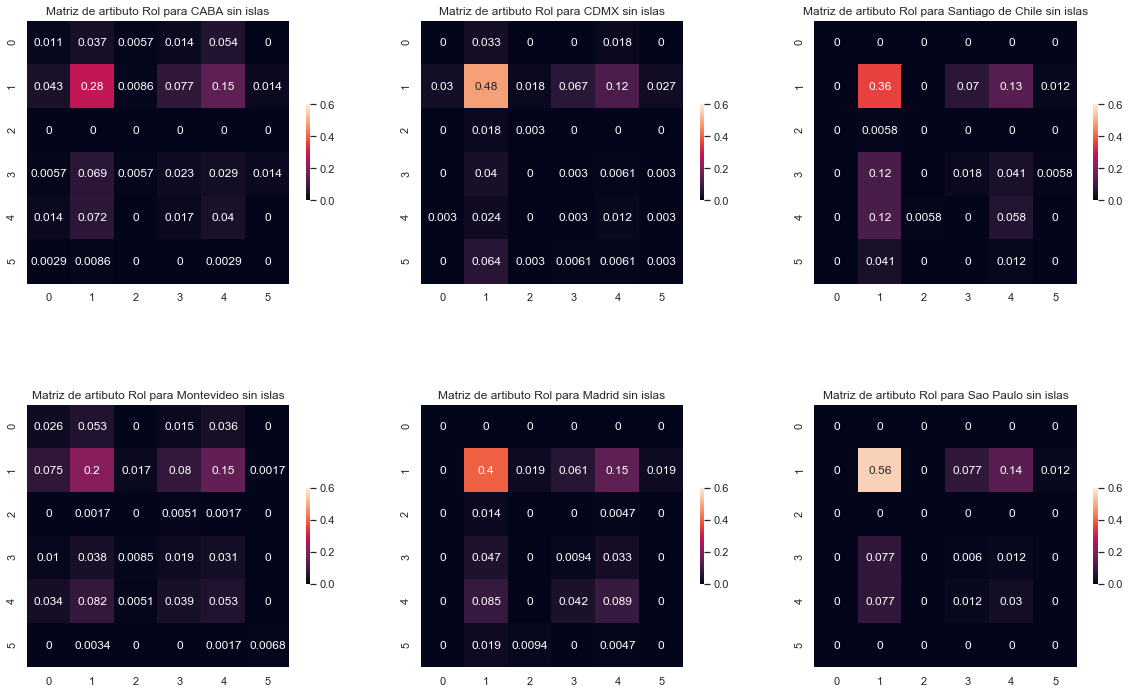

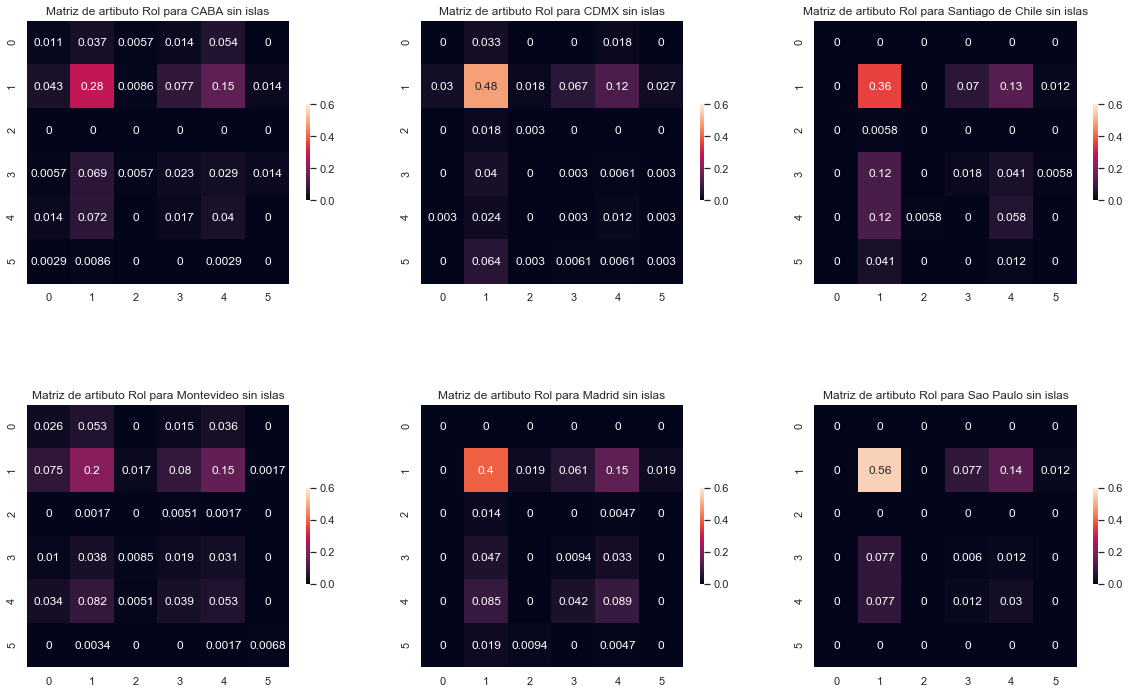

In [6]:
#------------------------------------------------
#  Attribute Mixing Matrices - Core graphs
#------------------------------------------------
#     Para cada uno de los grafos corteza que conseguimos, 
#     Obtenemos una matriz cuya entrada (i,j) es la fracción 
#     de aristas que van de un eje con rol i a un eje con rol j


rol_map_esp={'Generador de conocimiento':0,'Habilitador':1,'Promotor':2,
             'Vinculador':3,'Articulador':4,'Comunidad':5}

rol_map_ing={'Knowledge Generator':0,'Enabler':1,'Promoter':2,
             'Linker':3,'Articulator':4,'Community':5}

capitals_cores={'CABA': caba_sin_islas, 'CDMX':cdmx_sin_islas, 'Santiago de Chile': scl_sin_islas, 
                'Montevideo': mtv_sin_islas, 'Madrid': mad_sin_islas, 'Sao Paulo': sao_sin_islas}
attr_mix_matrices = capitals_cores 
        


for capital_str in capitals.keys():
    if capital_str=='Montevideo':
        print('Matriz de artibuto Rol para el core de '+capital_str)
        print('')
        M=nx.attribute_mixing_matrix(capitals_cores[capital_str],'rol',mapping=rol_map_ing)
        print(M)
        print('')
        print('')
    else:
        print('Matriz de artibuto Rol para el core de '+capital_str)
        print('')
        M=nx.attribute_mixing_matrix(capitals_cores[capital_str],'rol',mapping=rol_map_esp)
        print(M)
        print('')
        print('')
    attr_mix_matrices[capital_str] = M

        
        
# Creamos la instancia de una figura, con subplots
fig = plt.figure(figsize = (20,20)) # width x height
ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax1.set_title('Matriz de artibuto Rol para CABA sin islas')

ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('Matriz de artibuto Rol para CDMX sin islas')

ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Matriz de artibuto Rol para Santiago de Chile sin islas')

ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Matriz de artibuto Rol para Montevideo sin islas')

ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Matriz de artibuto Rol para Madrid sin islas')

ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('Matriz de artibuto Rol para Sao Paulo sin islas')


# We use ax parameter to tell seaborn which subplot to use for this plot
sns.heatmap(data=attr_mix_matrices['CABA'], ax=ax1, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)
sns.heatmap(data=attr_mix_matrices['CDMX'], ax=ax2, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)
sns.heatmap(data=attr_mix_matrices['Santiago de Chile'], ax=ax3, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)
sns.heatmap(data=attr_mix_matrices['Montevideo'], ax=ax4, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)
sns.heatmap(data=attr_mix_matrices['Madrid'], ax=ax5, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)      
sns.heatmap(data=attr_mix_matrices['Sao Paulo'], ax=ax6, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)      


fig


In [7]:
caba_sin_islas_nd=pd.read_csv('Gephi_sin_islas/CABA sin islas nodes.csv')
cdmx_sin_islas_nd=pd.read_csv('Gephi_sin_islas/CDMX sin islas nodes.csv')
mad_sin_islas_nd=pd.read_csv('Gephi_sin_islas/Mad sin islas nodes.csv')
mtv_sin_islas_nd=pd.read_csv('Gephi_sin_islas/Mtv sin islas nodes.csv')
sao_sin_islas_nd=pd.read_csv('Gephi_sin_islas/Sao sin islas nodes.csv')
scl_sin_islas_nd=pd.read_csv('Gephi_sin_islas/Scl sin islas nodes.csv') 

In [8]:
#----------------------------
# Medidas Globales
#----------------------------
#     Ahora obtenemos, para cada una de las capitales, una serie 
#     pandas.core.series.Series, utilizando la función mean(), 
#     con la que obtenemos las siguientes centralidades 
#           - timeset
#           - mentions    
#           - avg strength                    promedio de la fuerza de los nodos
#           - weight                          promedio del peso de los nodos
#           - indegree                        promedio del grado hacia los nodos
#           - outdegree                       promedio del grado fuera de los nodos
#           - Degree                          promedio de in+out
#           - weighted indegree               promedio del grado hacia los nodos con pesos de acuerdo a intensidades
#           - weighted outdegree             promedio del grado fuera de los nodos con pesos de acuerdo a intensidades
#           - Weighted Degree                promedio in+out de acuerdo a intensidades
#           - Eccentricity                   promedio de eccentricidad 
#           - closnesscentrality              
#           - harmonicclosnesscentrality      
#           - betweenesscentrality          
#           - modularity_class                
#           - Authority                       promedio de autoridad de los nodos de acuerdo al aloritmo HITS
#           - Hub                             promedio de Hubs de los nodos de acuerdo al aloritmo HITS
#           - componentnumber                 número de componentes
#           - strongcompnum                  número de componentes fuertemente conectados
#           - clustering                     promedio de coeficiente de clustering
#           - triangles                      
#           - eigencentrality                 promedio de centralidades eigenvectores

capitals_stats={'CABA': caba_sin_islas_nd, 'CDMX':cdmx_sin_islas_nd, 'Santiago de Chile': scl_sin_islas_nd, 
                'Montevideo': mtv_sin_islas_nd, 'Madrid': mad_sin_islas_nd, 'Sao Paulo': sao_sin_islas_nd}


averages={city: stats.mean() for city,stats in capitals_stats.items()}
averages['Sao Paulo']

timeset                              NaN
d1                              1.973626
indegree                        2.362637
outdegree                       2.362637
Degree                          4.725275
Eccentricity                    3.824176
closnesscentrality              0.206611
harmonicclosnesscentrality      0.239699
betweenesscentrality          126.659341
modularity_class                1.945055
clustering                      0.244116
eigencentrality                 0.190468
weighted indegree               8.153846
weighted outdegree              8.153846
Weighted Degree                16.307692
dtype: float64

In [9]:
#Ejemplo: Aquí vamos a conseguir el CSV para CDMX sin islas en donde conocemos algunas de sus métricas

city='CDMX'
avg=averages[city]
datafr=avg.copy().to_frame().T
datafr.drop(['timeset'], axis=1, inplace=True)
if 'type' in datafr.columns:
    datafr.drop(['type'], axis=1, inplace=True)

all_columns = datafr.columns.values.tolist()
print(all_columns)
print('')
print('')
print('')
datafr

['d1', 'indegree', 'outdegree', 'Degree', 'weighted indegree', 'weighted outdegree', 'Weighted Degree', 'Eccentricity', 'closnesscentrality', 'harmonicclosnesscentrality', 'betweenesscentrality', 'modularity_class', 'clustering', 'eigencentrality']





,d1,indegree,outdegree,Degree,weighted indegree,weighted outdegree,Weighted Degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,modularity_class,clustering,eigencentrality
0,2.307936,2.611111,2.611111,5.222222,9.063492,9.063492,18.126984,3.619048,0.198771,0.225079,156.222222,3.452381,0.110592,0.179422


In [10]:
countries={'Montevideo':'Uruguay', 'CABA':'Argentina', 'CDMX':'México',
          'Madrid':'España', 'Sao Paulo': 'Brasil', 'Santiago de Chile': 'Chile'}


list_concat=[]
for city,avg in averages.items():
    datafr=avg.copy().to_frame().T
    
    #borramos del set de columnas a aquellos atributos que no son significantes 
    datafr.drop(['timeset'], axis=1, inplace=True)
    if 'type' in datafr.columns:
        datafr.drop(['type'], axis=1, inplace=True)
    
    #añadimos datafr a la lista de dataframes que vamos a concatenar
    list_concat.append(datafr)
    
    #añadimos el atributo que corresponde a el nombre de ciudad y país
    datafr.insert(0, 'País', [countries[city]], True) 
    datafr.insert(0, 'Ciudad', [city], True) 

df_concat=pd.concat(list_concat, ignore_index=True)
df_concat

,Ciudad,País,d1,indegree,outdegree,Degree,weighted indegree,weighted outdegree,Weighted Degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,modularity_class,Authority,Hub,clustering,eigencentrality
0,CABA,Argentina,2.279646,3.088496,3.088496,6.176991,9.601770,9.601770,19.203540,3.884956,0.377842,0.412624,94.955752,2.769912,0.060898,0.050444,NaN,NaN
1,CDMX,México,2.307936,2.611111,2.611111,5.222222,9.063492,9.063492,18.126984,3.619048,0.198771,0.225079,156.222222,3.452381,NaN,NaN,0.110592,0.179422
2,Santiago de Chile,Chile,2.404762,2.928571,2.928571,5.857143,9.845238,9.845238,19.690476,3.809524,0.192974,0.228054,111.666667,2.690476,NaN,NaN,0.220837,0.147363
3,Montevideo,Uruguay,4.348214,5.232143,5.232143,10.464286,17.142857,17.142857,34.285714,4.267857,0.277862,0.312725,164.794643,2.714286,NaN,NaN,0.237409,0.170969
4,Madrid,España,2.118095,2.733333,2.733333,5.466667,8.790476,8.790476,17.580952,5.047619,0.204010,0.239418,199.571429,2.447619,NaN,NaN,0.187666,0.198474
5,Sao Paulo,Brasil,1.973626,2.362637,2.362637,4.725275,8.153846,8.153846,16.307692,3.824176,0.206611,0.239699,126.659341,1.945055,NaN,NaN,0.244116,0.190468


In [11]:
df_concat.isnull().sum()

Ciudad                        0
País                          0
d1                            0
indegree                      0
outdegree                     0
Degree                        0
weighted indegree             0
weighted outdegree            0
Weighted Degree               0
Eccentricity                  0
closnesscentrality            0
harmonicclosnesscentrality    0
betweenesscentrality          0
modularity_class              0
Authority                     5
Hub                           5
clustering                    1
eigencentrality               1
dtype: int64

In [12]:
#--------------------------------------
# Tidying Dataframe: Removing columns
#--------------------------------------
#Quitar promedios que en la pagina no mencionan que describen una propiedad global del grafo

df_concat=df_concat.drop('closnesscentrality',axis=1)
df_concat=df_concat.drop('harmonicclosnesscentrality',axis=1)
df_concat=df_concat.drop('modularity_class',axis=1)
#df_concat=df_concat.drop('triangles',axis=1)
df_concat=df_concat.drop('eigencentrality',axis=1)
#df_concat=df_concat.drop('pageranks',axis=1)
#df_concat=df_concat.drop('ego',axis=1)
df_concat=df_concat.drop('betweenesscentrality',axis=1)

df_concat=df_concat.drop('Authority',axis=1)
df_concat=df_concat.drop('Hub',axis=1)


In [13]:
#df_concat['weight'][3]=df_concat['node size'][3]
#df_concat=df_concat.drop('node size',axis=1)
#df_concat=df_concat.drop('strongcompnum',axis=1)

In [14]:
df_concat

,Ciudad,País,d1,indegree,outdegree,Degree,weighted indegree,weighted outdegree,Weighted Degree,Eccentricity,clustering
0,CABA,Argentina,2.279646,3.088496,3.088496,6.176991,9.601770,9.601770,19.203540,3.884956,NaN
1,CDMX,México,2.307936,2.611111,2.611111,5.222222,9.063492,9.063492,18.126984,3.619048,0.110592
2,Santiago de Chile,Chile,2.404762,2.928571,2.928571,5.857143,9.845238,9.845238,19.690476,3.809524,0.220837
3,Montevideo,Uruguay,4.348214,5.232143,5.232143,10.464286,17.142857,17.142857,34.285714,4.267857,0.237409
4,Madrid,España,2.118095,2.733333,2.733333,5.466667,8.790476,8.790476,17.580952,5.047619,0.187666
5,Sao Paulo,Brasil,1.973626,2.362637,2.362637,4.725275,8.153846,8.153846,16.307692,3.824176,0.244116


In [15]:
"""
Global characteristics we may compute:

*Diameter  
*Radius
**Average path length
**Transitivity
*Global Efficiency
***Modularity
Assortativity Coefficient
Small Worldness


*    = computed already, not defined for direted graph
**   = computed for undirected graph, also defined for directed graph
***  = computed manually

"""


'\nGlobal characteristics we may compute:\n\n*Diameter  \n*Radius\n**Average path length\n**Transitivity\n*Global Efficiency\n***Modularity\nAssortativity Coefficient\nSmall Worldness\n\n\n*    = computed already, not defined for direted graph\n**   = computed for undirected graph, also defined for directed graph\n***  = computed manually\n\n'

In [16]:
#--------------
# Diameter
#--------------
capitals={'CABA': caba_sin_islas, 'CDMX': cdmx_sin_islas, 'Santiago de Chile': scl_sin_islas, 
          'Montevideo': mtv_sin_islas, 'Madrid': mad_sin_islas, 'Sao Paulo': sao_sin_islas}

print('-------------------------------------------')
print('Diámetro en Cores dirigidos')
print('-------------------------------------------')
for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.diameter(graph)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')

print('-------------------------------------------')
print('Diámetro en Cores no dirigidos')
print('-------------------------------------------')
for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.diameter(nx.to_undirected(graph))))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')    


-------------------------------------------
Diámetro en Cores dirigidos
-------------------------------------------
CABA: inf

CDMX: inf

Santiago de Chile: inf

Montevideo: inf

Madrid: inf

Sao Paulo: inf

-------------------------------------------
Diámetro en Cores no dirigidos
-------------------------------------------
CABA: 5

CDMX: 6

Santiago de Chile: 5

Montevideo: 5

Madrid: 5

Sao Paulo: 6



In [17]:
#--------------
# Radius
#--------------

print('-------------------------------------------')
print('Radio en Cores dirigidos')
print('-------------------------------------------')
for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.radius(graph)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')

print('-------------------------------------------')
print('Radio en Cores no dirigidos')
print('-------------------------------------------')
for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.radius(nx.to_undirected(graph))))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')    

-------------------------------------------
Radio en Cores dirigidos
-------------------------------------------
CABA: inf

CDMX: inf

Santiago de Chile: inf

Montevideo: inf

Madrid: inf

Sao Paulo: inf

-------------------------------------------
Radio en Cores no dirigidos
-------------------------------------------
CABA: 3

CDMX: 3

Santiago de Chile: 3

Montevideo: 3

Madrid: 3

Sao Paulo: 4



In [18]:
#---------------------------------
# Camino más corto promedio
#---------------------------------

# parece que aunque las graficas dirigidas no sean conexas, el camino 
# más corto promedio si se está pudiendo computar, y nos da un resultado.. menor?

print('-------------------------------------------')
print('Camino más corto promedio en Cores dirigidos')
print('-------------------------------------------')
for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.average_shortest_path_length(graph)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')

print('-------------------------------------------')
print('Camino más corto promedio en Cores no dirigidos')
print('-------------------------------------------')
for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.average_shortest_path_length(nx.to_undirected(graph))))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')       


-------------------------------------------
Camino más corto promedio en Cores dirigidos
-------------------------------------------
CABA: 1.5816213653603035

CDMX: 1.6718095238095239

Santiago de Chile: 1.8957257601835915

Montevideo: 2.243886743886744

Madrid: 2.581959706959707

Sao Paulo: 1.8481074481074482

-------------------------------------------
Camino más corto promedio en Cores no dirigidos
-------------------------------------------
CABA: 2.6956384323640963

CDMX: 3.020952380952381

Santiago de Chile: 2.591508892713712

Montevideo: 2.454954954954955

Madrid: 2.9153846153846152

Sao Paulo: 3.195848595848596



In [19]:
#---------------------------------
# Transitividad
#---------------------------------

# parece que aunque las graficas dirigidas no sean conexas, el camino 
# más corto promedio si se está pudiendo computar, y nos da un resultado.. menor?
print('----------------------------------')
print('Transitividad en Cores dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.transitivity(graph)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')

print('----------------------------------')
print('Transitividad en Cores no dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.transitivity(nx.to_undirected(graph))))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('') 

----------------------------------
Transitividad en Cores dirigidos
----------------------------------
CABA: 0.07450856055802156

CDMX: 0.03855421686746988

Santiago de Chile: 0.09201213346814964

Montevideo: 0.16296766011414077

Madrid: 0.07560355781448538

Sao Paulo: 0.06448911222780569

----------------------------------
Transitividad en Cores no dirigidos
----------------------------------
CABA: 0.15344207907105337

CDMX: 0.10093896713615023

Santiago de Chile: 0.17789072426937738

Montevideo: 0.26031142279805064

Madrid: 0.1368330464716007

Sao Paulo: 0.14213926776740848



In [20]:
#-----------------------
# Eficiencia Global
#-----------------------
# Solo esta definida para las versiones no dirigidas de nuestras redes

print('----------------------------------')
print('Eficiencia Global en Cores dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.global_efficiency(graph)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')

print('----------------------------------')
print('Eficiencia Global en Cores no dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.global_efficiency(nx.to_undirected(graph))))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('') 

----------------------------------
Eficiencia Global en Cores dirigidos
----------------------------------
CABA: inf

CDMX: inf

Santiago de Chile: inf

Montevideo: inf

Madrid: inf

Sao Paulo: inf

----------------------------------
Eficiencia Global en Cores no dirigidos
----------------------------------
CABA: 0.4126237884534253

CDMX: 0.3718920634920404

Santiago de Chile: 0.4332807420156935

Montevideo: 0.4584513084512756

Madrid: 0.3884615384615562

Sao Paulo: 0.36233618233618725



In [21]:
#-------------------
# Modularidad
#-------------------

#modularidad Parece no estar definido en este esquema, pero podemos obtener esta medida de Gephi

print('----------------------------------')
print('Modularidad en Cores dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.community.modularity(graph)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')

print('----------------------------------')
print('Modularidad en Cores no dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.community.modularity(nx.to_undirected(graph))))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('') 

----------------------------------
Modularidad en Cores dirigidos
----------------------------------
CABA: inf

CDMX: inf

Santiago de Chile: inf

Montevideo: inf

Madrid: inf

Sao Paulo: inf

----------------------------------
Modularidad en Cores no dirigidos
----------------------------------
CABA: inf

CDMX: inf

Santiago de Chile: inf

Montevideo: inf

Madrid: inf

Sao Paulo: inf



In [22]:
#---------------------------
# Assortativity coefficient
#---------------------------

print('----------------------------------')
print('Coef. Asortatividad en Cores dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.degree_assortativity_coefficient(graph)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')

print('----------------------------------')
print('Coef. Asortatividad en Cores no dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.degree_assortativity_coefficient(nx.to_undirected(graph))))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('') 

----------------------------------
Coef. Asortatividad en Cores dirigidos
----------------------------------
CABA: -0.11894805344529319

CDMX: -0.052964583819806066

Santiago de Chile: -0.16427459776958883

Montevideo: -0.028593074241653103

Madrid: -0.015531959680436474

Sao Paulo: -0.07170952553088229

----------------------------------
Coef. Asortatividad en Cores no dirigidos
----------------------------------
CABA: -0.1724558765617381

CDMX: -0.23835044241861686

Santiago de Chile: -0.21710386763238582

Montevideo: -0.07702079123948172

Madrid: -0.14386688676321646

Sao Paulo: -0.26044031696903985



In [23]:
#------------------
# Small Worldness
#------------------

#networkx.algorithms.smallworld.random_reference
print('----------------------------------')
print('Small Worldness en Cores dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.algorithms.smallworld.sigma(graph,niter=1,nrand=2)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')

print('----------------------------------')
print('Small Worldness en Cores no dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.algorithms.smallworld.sigma(graph.to_undirected(),niter=1,nrand=2)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('') 

----------------------------------
Small Worldness en Cores dirigidos
----------------------------------
CABA: inf

CDMX: inf

Santiago de Chile: inf

Montevideo: inf

Madrid: inf

Sao Paulo: inf

----------------------------------
Small Worldness en Cores no dirigidos
----------------------------------
CABA: 1.077921331980587

CDMX: 1.2449775084225783

Santiago de Chile: 1.1102858734386942

Montevideo: 1.1998413524115785

Madrid: 1.10944672527786

Sao Paulo: 1.249891750082779



In [24]:
##### -----------------
#  Modularidades
#-----------------
#     Estas medidas fueron tomadas no por medio de este programa, sino manualmente desde el programa Gephi
#     Metodología:
#        Tomamos tres medidas en cada red, con cada una de las resoluciones 0.8, 1.0, 1.2, con o sin ejes
#
#        Network       (CABA, CDMX, MAD, MTV SAO, SCL)
#        Resolution    (0.8, 1.0, 1.2)  
#        Edge weights  (Y/N)
#        
#        Y luego de ello tomamos la mediana de las tres medidas de resolución, a modo de tomar en cuenta variabilidad




df_concat['Modularidad con pesos (0.8)'] = [0.348, 0.421, 0.350, 0.203, 0.331, 0.375]
df_concat['Modularidad con pesos (1.0)'] = [0.352, 0.437, 0.357, 0.288, 0.443, 0.514]
df_concat['Modularidad con pesos (1.2)'] = [0.348, 0.419, 0.356, 0.413, 0.575, 0.671]


df_concat['Modularidad sin pesos (0.8)'] = [0.342, 0.431, 0.354, 0.196, 0.310, 0.373]
df_concat['Modularidad sin pesos (1.0)'] = [0.351, 0.405, 0.353, 0.285, 0.404, 0.502]
df_concat['Modularidad sin pesos (1.2)'] = [0.349, 0.432, 0.359, 0.398, 0.528, 0.646]

df_concat

,Ciudad,País,d1,indegree,outdegree,Degree,weighted indegree,weighted outdegree,Weighted Degree,Eccentricity,clustering,Modularidad con pesos (0.8),Modularidad con pesos (1.0),Modularidad con pesos (1.2),Modularidad sin pesos (0.8),Modularidad sin pesos (1.0),Modularidad sin pesos (1.2)
0,CABA,Argentina,2.279646,3.088496,3.088496,6.176991,9.601770,9.601770,19.203540,3.884956,NaN,0.348,0.352,0.348,0.342,0.351,0.349
1,CDMX,México,2.307936,2.611111,2.611111,5.222222,9.063492,9.063492,18.126984,3.619048,0.110592,0.421,0.437,0.419,0.431,0.405,0.432
2,Santiago de Chile,Chile,2.404762,2.928571,2.928571,5.857143,9.845238,9.845238,19.690476,3.809524,0.220837,0.350,0.357,0.356,0.354,0.353,0.359
3,Montevideo,Uruguay,4.348214,5.232143,5.232143,10.464286,17.142857,17.142857,34.285714,4.267857,0.237409,0.203,0.288,0.413,0.196,0.285,0.398
4,Madrid,España,2.118095,2.733333,2.733333,5.466667,8.790476,8.790476,17.580952,5.047619,0.187666,0.331,0.443,0.575,0.310,0.404,0.528
5,Sao Paulo,Brasil,1.973626,2.362637,2.362637,4.725275,8.153846,8.153846,16.307692,3.824176,0.244116,0.375,0.514,0.671,0.373,0.502,0.646


In [25]:
capitals = {'CABA': caba_sin_islas, 'CDMX':cdmx_sin_islas, 'Santiago de Chile': scl_sin_islas, 'Montevideo': mtv_sin_islas, 'Madrid': mad_sin_islas, 'Sao Paulo': sao_sin_islas}

#las columnas que vamos a aregar al DataFrame
diameter = [0]*len(capitals)
radius = [0]*len(capitals)
avg_shortest_path_length = [0]*len(capitals)
transitivity = [0]*len(capitals)
global_efficiency = [0]*len(capitals)
modularity = [0]*len(capitals)

small_worldness = [0]*len(capitals)


for city, graph in capitals.items():
    city_index=df_concat.index[df_concat['Ciudad']==city].tolist()[0]
    
    #conseguimos cada parámetro para esta ciudad
    undirected=nx.to_undirected(graph)
    diameter[city_index] =                     nx.diameter(undirected)
    radius[city_index] =                       nx.radius(undirected)
    avg_shortest_path_length[city_index] =     nx.average_shortest_path_length(undirected)
    transitivity[city_index] =                 nx.transitivity(undirected)
    global_efficiency[city_index] =            nx.global_efficiency(undirected)
    small_worldness[city_index] =              nx.nx.algorithms.smallworld.sigma(graph.to_undirected(),niter=1,nrand=5)

    
    #espacio para modularidad
    
    #deg_assortativity_coefficient[city_index]= nx.degree_assortativity_coefficient(undirected)
    
df_concat['Diámetro'] = diameter
df_concat['Radio'] = radius
df_concat['Camino más corto promedio'] = avg_shortest_path_length
df_concat['Transitividad'] = transitivity
df_concat['Eficiencia Global'] = global_efficiency
#df_concat['Coeficiente de Asortatividad de Grado'] = deg_assortativity_coefficient
df_concat['Small Worldness']= small_worldness
df_concat

,Ciudad,País,d1,indegree,outdegree,Degree,weighted indegree,weighted outdegree,Weighted Degree,Eccentricity,...,Modularidad con pesos (1.2),Modularidad sin pesos (0.8),Modularidad sin pesos (1.0),Modularidad sin pesos (1.2),Diámetro,Radio,Camino más corto promedio,Transitividad,Eficiencia Global,Small Worldness
0,CABA,Argentina,2.279646,3.088496,3.088496,6.176991,9.601770,9.601770,19.203540,3.884956,...,0.348,0.342,0.351,0.349,5,3,2.695638,0.153442,0.412624,1.036295
1,CDMX,México,2.307936,2.611111,2.611111,5.222222,9.063492,9.063492,18.126984,3.619048,...,0.419,0.431,0.405,0.432,6,3,3.020952,0.100939,0.371892,1.094598
2,Santiago de Chile,Chile,2.404762,2.928571,2.928571,5.857143,9.845238,9.845238,19.690476,3.809524,...,0.356,0.354,0.353,0.359,5,3,2.591509,0.177891,0.433281,1.160329
3,Montevideo,Uruguay,4.348214,5.232143,5.232143,10.464286,17.142857,17.142857,34.285714,4.267857,...,0.413,0.196,0.285,0.398,5,3,2.454955,0.260311,0.458451,1.186072
4,Madrid,España,2.118095,2.733333,2.733333,5.466667,8.790476,8.790476,17.580952,5.047619,...,0.575,0.310,0.404,0.528,5,3,2.915385,0.136833,0.388462,1.143772
5,Sao Paulo,Brasil,1.973626,2.362637,2.362637,4.725275,8.153846,8.153846,16.307692,3.824176,...,0.671,0.373,0.502,0.646,6,4,3.195849,0.142139,0.362336,1.230154


In [26]:
#Cambiar los nombres de los atributos del DataFrame
#algunos nombres de columnas no fueron modificados para facilitar legibilidad
df_concat.rename(columns={'mentions': 'Menciones', 'Eccentricity': 'Eccentricidad', 'clustering':'Clustering'}, inplace=True)
df_concat

,Ciudad,País,d1,indegree,outdegree,Degree,weighted indegree,weighted outdegree,Weighted Degree,Eccentricidad,...,Modularidad con pesos (1.2),Modularidad sin pesos (0.8),Modularidad sin pesos (1.0),Modularidad sin pesos (1.2),Diámetro,Radio,Camino más corto promedio,Transitividad,Eficiencia Global,Small Worldness
0,CABA,Argentina,2.279646,3.088496,3.088496,6.176991,9.601770,9.601770,19.203540,3.884956,...,0.348,0.342,0.351,0.349,5,3,2.695638,0.153442,0.412624,1.036295
1,CDMX,México,2.307936,2.611111,2.611111,5.222222,9.063492,9.063492,18.126984,3.619048,...,0.419,0.431,0.405,0.432,6,3,3.020952,0.100939,0.371892,1.094598
2,Santiago de Chile,Chile,2.404762,2.928571,2.928571,5.857143,9.845238,9.845238,19.690476,3.809524,...,0.356,0.354,0.353,0.359,5,3,2.591509,0.177891,0.433281,1.160329
3,Montevideo,Uruguay,4.348214,5.232143,5.232143,10.464286,17.142857,17.142857,34.285714,4.267857,...,0.413,0.196,0.285,0.398,5,3,2.454955,0.260311,0.458451,1.186072
4,Madrid,España,2.118095,2.733333,2.733333,5.466667,8.790476,8.790476,17.580952,5.047619,...,0.575,0.310,0.404,0.528,5,3,2.915385,0.136833,0.388462,1.143772
5,Sao Paulo,Brasil,1.973626,2.362637,2.362637,4.725275,8.153846,8.153846,16.307692,3.824176,...,0.671,0.373,0.502,0.646,6,4,3.195849,0.142139,0.362336,1.230154


In [27]:
df_concat.to_csv('Tidy_DataFrame_sin_islas.csv',index=False)

In [28]:
df_concat.isnull().sum()

Ciudad                         0
País                           0
d1                             0
indegree                       0
outdegree                      0
Degree                         0
weighted indegree              0
weighted outdegree             0
Weighted Degree                0
Eccentricidad                  0
Clustering                     1
Modularidad con pesos (0.8)    0
Modularidad con pesos (1.0)    0
Modularidad con pesos (1.2)    0
Modularidad sin pesos (0.8)    0
Modularidad sin pesos (1.0)    0
Modularidad sin pesos (1.2)    0
Diámetro                       0
Radio                          0
Camino más corto promedio      0
Transitividad                  0
Eficiencia Global              0
Small Worldness                0
dtype: int64